# Data info

Link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

**People**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

# Prepare

## Set up

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
from pandas.tseries.offsets import DateOffset

In [ ]:
# mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get data

In [ ]:
# set the path of the CSV file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/MindX Practice/BI/marketing_campaign.csv'

# load the CSV file into a DataFrame
marketing_campaign = pd.read_csv(file_path)

# display data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# copy dataframe
mc = marketing_campaign.copy()

# view the dataframe
mc.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


# Clean data

## Checking data

### Overall

In [ ]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
mc.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# no duplicated
mc.duplicated().sum()

0

In [ ]:
# 'Income' has null values
mc.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# checking to re-group
mc['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

### Columns

In [ ]:
# check columns format
mc.columns

for x in mc.columns:
  print(x)

ID
Year_Birth
Education
Marital_Status
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


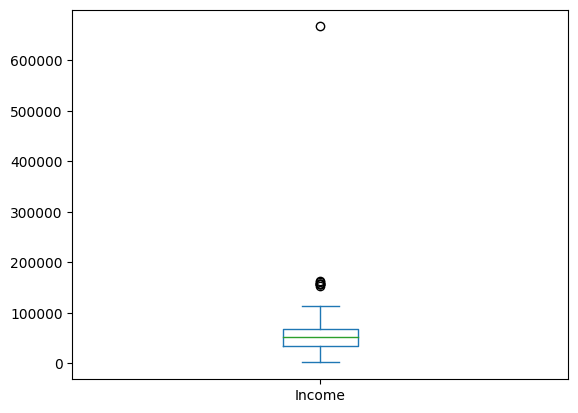

In [ ]:
mc['Income'].plot.box()
plt.show()
# Income has some outliers,
# however there are 1 outliers that extremely out of data range and the number also unreliable
# --> Drop the row.

<Axes: >

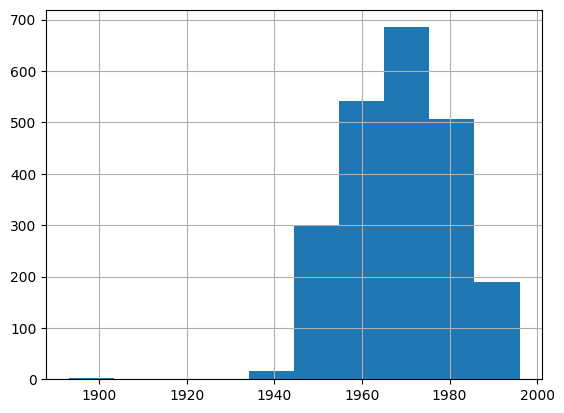

In [ ]:
mc['Year_Birth'].hist()

In [ ]:
# there are some people born in 1899, 1893 and 1900 --- considering refill mean value
mc[(mc['Year_Birth'] == 1899)|(mc['Year_Birth'] == 1893)|(mc['Year_Birth'] == 1900)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


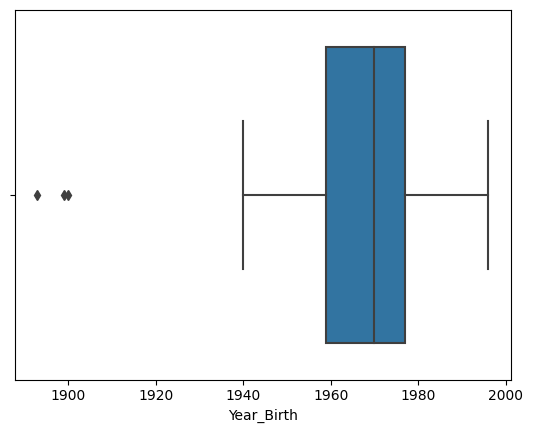

In [ ]:
# Checking outliers in 'year_birth'
sns.boxplot(data = mc
              , x = 'Year_Birth')

plt.show()

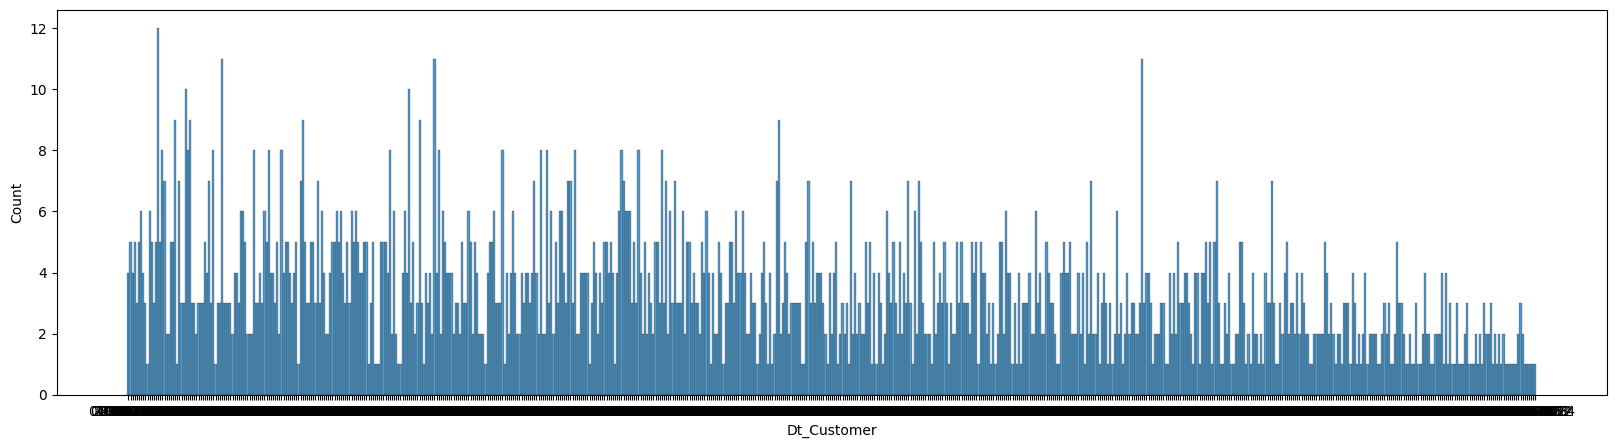

In [ ]:
# Checking outliers in 'Dt_customer'
plt.figure(figsize = (20,5))
sns.histplot(data = mc
              , x = 'Dt_Customer')

plt.show()

In [ ]:
# count 'Education' values
mc['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
# Check duplicate in 'ID'
mc.duplicated('ID').sum()

0

<Axes: >

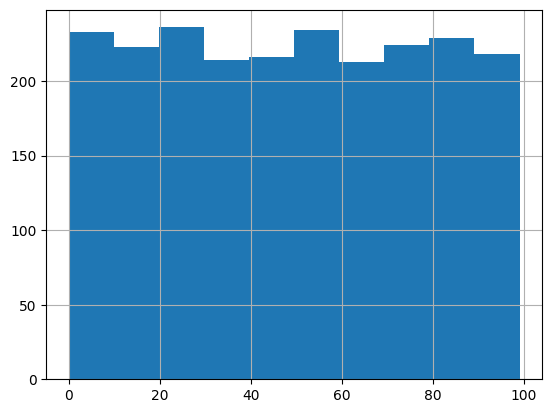

In [ ]:
mc['Recency'].hist()

In [ ]:
mc[['Z_CostContact', 'Z_Revenue']].value_counts()

# there only 1 number in each group, there are not much values.

Z_CostContact  Z_Revenue
3              11           2240
dtype: int64

## Cleaning data

### Income

In [ ]:
mc['Income']

0        58138.0
1        46344.0
2        71613.0
3        26646.0
4        58293.0
5        62513.0
6        55635.0
7        33454.0
8        30351.0
9         5648.0
10           NaN
11        7500.0
12       63033.0
13       59354.0
14       17323.0
15       82800.0
16       41850.0
17       37760.0
18       76995.0
19       33812.0
20       37040.0
21        2447.0
22       58607.0
23       65324.0
24       40689.0
25       18589.0
26       53359.0
27           NaN
28       38360.0
29       84618.0
30       10979.0
31       38620.0
32       40548.0
33       46610.0
34       68657.0
35       49389.0
36       67353.0
37       23718.0
38       42429.0
39       48948.0
40       80011.0
41       20559.0
42       21994.0
43           NaN
44        7500.0
45       79941.0
46        7500.0
47       41728.0
48           NaN
49       72550.0
50       65486.0
51       79143.0
52       35790.0
53       82582.0
54       66373.0
55       82384.0
56       70287.0
57       27938.0
58           N

In [ ]:
# column 'Income' has null values -- fill in values by the median of Income
mc = mc.fillna(mc['Income'].median())

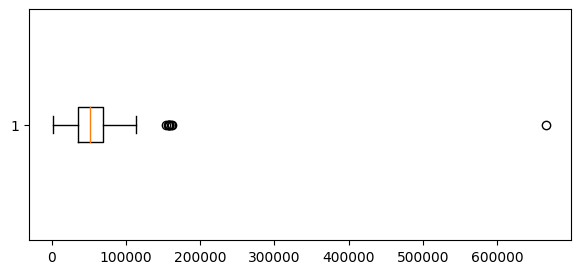

In [ ]:
plt.figure(figsize=(7, 3))
plt.boxplot(mc['Income'], vert=False)

plt.show()

In [ ]:
# Drop the outliers in Income
mc = mc[mc['Income'] < 200000]

### Dt_Customer

In [ ]:
mc['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2239 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype 
--------------  ----- 
2239 non-null   object
dtypes: object(1)
memory usage: 35.0+ KB


In [ ]:
# date column 'Dt_Customer' is not in datatime datatype -- change datatype
mc['Dt_Customer'] = pd.to_datetime(mc['Dt_Customer'], dayfirst = True)

<ipython-input-12-d40f359816f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc['Dt_Customer'] = pd.to_datetime(mc['Dt_Customer'], dayfirst = True)


### Year_birth

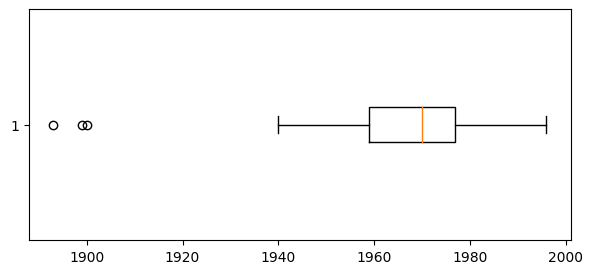

In [ ]:
plt.figure(figsize=(7, 3))
plt.boxplot(mc['Year_Birth'], vert=False)

plt.show()

In [ ]:
# considering that the data were incorrectly fill -- change to the median data
mc.loc[mc['Year_Birth'] <= 1900, 'Year_Birth'] = int(mc['Year_Birth'].median())

In [ ]:
# create birth group

def Birth_group(x):
  if x >= 45:
    return 'Senior'
  elif x >= 30:
    return 'Adult'
  elif x >= 18:
    return 'Young-adult'
  else:
    return 'Children'

In [ ]:
mc['Age group'] = (2014 - mc['Year_Birth']).apply(Birth_group)

### Education

In [ ]:
mc['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
# Resize Education by 2 groups: Undergraduate and Postgraduate
edu_clean = {
    'Graduation': 'Postgraduate'
    , 'PhD'     : 'Postgraduate'
    , 'Master'  : 'Postgraduate'
    , 'Basic'   : 'Undergraduate'
    , '2n Cycle': 'Undergraduate'
}

mc['Education_clean'] = mc['Education'].replace(edu_clean)

In [ ]:
mc['Education_clean'].value_counts()

Postgraduate     1982
Undergraduate     257
Name: Education_clean, dtype: int64

### Marital group

In [ ]:
mc['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
# Resize Marital by 2 groups: Couple and Single
marital_clean = {
      'Together'  : 'Couple'
    , 'Married'   : 'Couple'
    , 'Divorced'  : 'Single'
    , 'Widow'     : 'Single'
    , 'Alone'     : 'Single'
    , 'Absurd'    : 'Single'
    , 'YOLO'      : 'Single'
}

mc['Marital_clean'] = mc['Marital_Status'].replace(marital_clean)

In [ ]:
mc['Marital_clean'].value_counts()

Couple    1443
Single     796
Name: Marital_clean, dtype: int64

### Children

There are columns: 'Kidhome' and 'Teenhome' have the same meaning --> sum up into a 'Total kid' columns

In [ ]:
# Children column
mc['Children'] = mc['Kidhome'] + mc['Teenhome']

### Promotion usage

Create a column sum up all the promotion that customer took part in.

In [ ]:
# Total promotion

mc['Promotion accepted'] = mc[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis = 1)

In [ ]:
mc['Promotion accepted'].value_counts()

0    1630
1     370
2     142
3      51
4      36
5      10
Name: Promotion accepted, dtype: int64

In [ ]:
mc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age group', 'Education_clean', 'Marital_clean', 'Children',
       'Promotion accepted'],
      dtype='object')

### Drop unreliable

In [ ]:
# Delete 2 columns 'Z_CostContact', 'Z_Revenue' and other unclean columns
mc = mc[['ID', 'Age group', 'Education_clean', 'Marital_clean', 'Children', 'Income', 'Dt_Customer', 'Recency',  # Customer anthropology
         'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',       # Products
         'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', # Purchase behaviors
         'Promotion accepted', 'Complain' # Responces
]]

### Rename columns

In [ ]:
# Change name columns

# rename columns for pbi
new_name = {  'MntWines'            : 'Wines'
            , 'MntFruits'           : 'Fruits'
            , 'MntMeatProducts'     : 'Meat'
            , 'MntFishProducts'     : 'Fish'
            , 'MntSweetProducts'    : 'Sweet'
            , 'MntGoldProds'        : 'Gold'
            , 'NumDealsPurchases'   : 'Deals'
            , 'NumWebPurchases'     : 'Web'
            , 'NumCatalogPurchases' : 'Catalog'
            , 'NumStorePurchases'   : 'Store'
            , 'NumWebVisitsMonth'   : 'Web Visit'
            , 'Dt_Customer'         : 'Enrollment date'}

mc = mc.rename(columns=new_name)

mc.columns

Index(['ID', 'Age group', 'Education_clean', 'Marital_clean', 'Children',
       'Income', 'Enrollment date', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweet', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'Web Visit', 'Promotion accepted', 'Complain'],
      dtype='object')

# RFM model

Definition: Marketing analysis technique used to segment and understand customer behavior based on their transaction history.

3 indicators:

- Recency
- Frequency
- Monetary

Create a dataframe RFM divide customers.

## Recency

<Axes: >

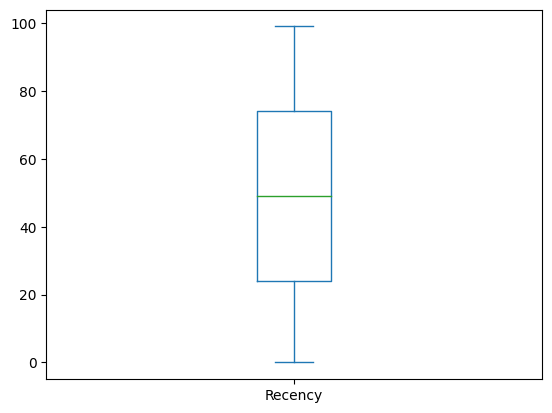

In [ ]:
# checking 'Recency' column
mc['Recency'].plot.box()

## Frequency

Dataset does not have 'Frequency' column.
To create 'Frequency' sum up 3 columns that illutrate number of purchases of customer:

- NumWebPurchases: Number of purchases made through the company’s website

- NumCatalogPurchases: Number of purchases made using a catalogue

- NumStorePurchases: Number of purchases made directly in stores

In [ ]:
# Products consumption

mc['Frequency'] = mc['Web'] + mc['Catalog'] + mc['Store']

<Axes: >

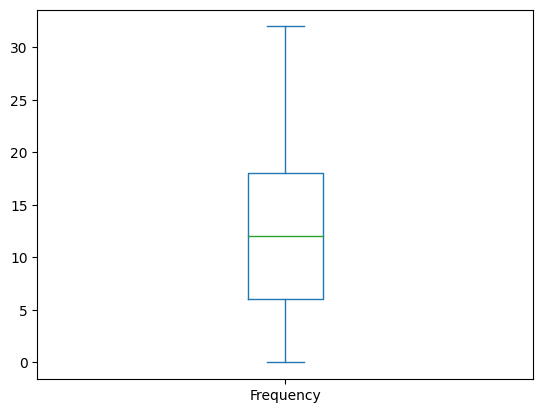

In [ ]:
mc['Frequency'].plot.box()

## Monetary

To create 'Monetary' column, sum up amount spent on each products of customer:

- MntWines: Amount spent on wine in last 2 years

- MntFruits: Amount spent on fruits in last 2 years

- MntMeatProducts: Amount spent on meat in last 2 years

- MntFishProducts: Amount spent on fish in last 2 years

- MntSweetProducts: Amount spent on sweets in last 2 years

- MntGoldProds: Amount spent on gold in last 2 years



In [ ]:
# Products consumption

mc['Monetary'] = mc[['Wines', 'Fruits', 'Meat','Fish', 'Sweet', 'Gold']].sum(axis=1)

<Axes: >

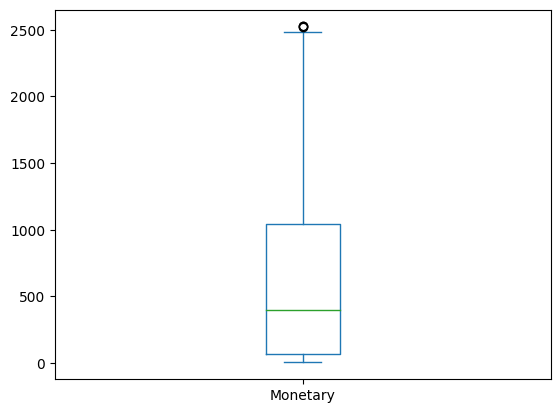

In [ ]:
mc['Monetary'].plot.box()

## RFM score and segments

RFM score is calculate by ranking each indicator.
Method is to divide indicators range in 5 parts and rank it from 1 to 5.

With:
- Recency (The last time customer bought from company): 5 is smallest and 1 is biggest
- Frequecy (How often customer purchases)             : 5 is biggest and 1 is smallest
- Monetary (How much customer spent)                  : 5 is biggest and 1 is smallest

And there are 10 segments:

| Segment | Frequency_score | Recency_score |
|---|:---:|:---:|
| Champion | 5 | 5 |
| Loyal Customer | 5 or 4 | 3 or 4 |
| Potential Customer | 3 or 2 | 5 or 4 |
| Need Attention | 3 | 3 |
| New Customer | 1 | 5 |
| Promising | 1 | 4 |
| About to sleep | 2 or 1 | 3 |
| Can’t loose them | 5 | 1 or 2 |
| At risk | 4 or 3 | 1 or 2 |
| Hibernating | 1 or 2 | 1 or 2 |


In [ ]:
# Divide indicators range into 5 parts and score them from 1 to 5.

# The lower the recency the better
mc['Recency_score'] = pd.cut(mc['Recency'],
                                    bins=[i * mc['Recency'].max()//5 for i in range(6)],
                                    labels=[5, 4, 3, 2, 1])
mc.loc[mc['Recency'] == 0, 'Recency_score'] = 5

# The higher the frequency and monetary the better
# Frequency
mc['Frequency_score'] = pd.cut(mc['Frequency'],
                                    bins=[i * mc['Frequency'].max()//5 for i in range(6)],
                                    labels=[1, 2, 3, 4, 5])
mc.loc[mc['Frequency'] == 0, 'Frequency_score'] = 1

# Monetary
mc['Monetary_score'] = pd.cut(mc['Monetary'],
                                    bins=[i * mc['Monetary'].max()//5 for i in range(6)],
                                    labels=[1, 2, 3, 4, 5])
mc.loc[mc['Monetary'] == 0, 'Monetary_score'] = 1


In [ ]:
# RMF segments
mc['RFM Segment'] = 'Non-defined'
mc.loc[(mc['Frequency_score'].isin([5, 4]))  & (mc['Recency_score'] == 5), 'RFM Segment']         = 'Champion'
mc.loc[(mc['Frequency_score'].isin([5, 4]))  & (mc['Recency_score'].isin([3, 4])), 'RFM Segment'] = 'Loyal Customer'
mc.loc[(mc['Frequency_score'].isin([3, 2]))  & (mc['Recency_score'].isin([5, 4])), 'RFM Segment'] = 'Potential Customer'
mc.loc[(mc['Frequency_score'] == 3)          & (mc['Recency_score'] == 3), 'RFM Segment']         = 'Need Attention'
mc.loc[(mc['Frequency_score'] == 1)          & (mc['Recency_score'] == 5), 'RFM Segment']         = 'New Customer'
mc.loc[(mc['Frequency_score'] == 1)          & (mc['Recency_score'] == 4), 'RFM Segment']         = 'Promising'
mc.loc[(mc['Frequency_score'].isin([2, 1]))  & (mc['Recency_score'] == 3), 'RFM Segment']         = 'About to sleep'
mc.loc[(mc['Frequency_score'] == 5)          & (mc['Recency_score'].isin([1, 2])), 'RFM Segment'] = 'Can’t loose them'
mc.loc[(mc['Frequency_score'].isin([4, 3]))  & (mc['Recency_score'].isin([1, 2])), 'RFM Segment'] = 'At risk'
mc.loc[(mc['Frequency_score'].isin([1, 2]))  & (mc['Recency_score'].isin([1, 2])), 'RFM Segment'] = 'Hibernating'

In [ ]:
mc.columns

Index(['ID', 'Age group', 'Education_clean', 'Marital_clean', 'Children',
       'Income', 'Enrollment date', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweet', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'Web Visit', 'Promotion accepted', 'Complain', 'Frequency', 'Monetary',
       'Recency_score', 'Frequency_score', 'Monetary_score', 'RFM Segment'],
      dtype='object')

In [ ]:
mc['RFM Segment'].value_counts()

Hibernating           446
Potential Customer    427
At risk               413
About to sleep        226
Loyal Customer        194
New Customer          152
Promising             139
Need Attention        126
Champion               91
Can’t loose them       25
Name: RFM Segment, dtype: int64

In [ ]:
mc.head()

,ID,Age group,Education_clean,Marital_clean,Children,Income,Enrollment date,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Deals,Web,Catalog,Store,Web Visit,Promotion accepted,Complain,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM Segment
0,5524,Senior,Postgraduate,Single,0,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,1,0,22,1617,3,4,4,Loyal Customer
1,2174,Senior,Postgraduate,Single,2,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,4,27,4,1,1,Promising
2,4141,Senior,Postgraduate,Couple,0,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,20,776,4,4,2,Loyal Customer
3,6182,Adult,Postgraduate,Couple,1,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,6,53,4,1,1,Promising
4,5324,Adult,Postgraduate,Couple,1,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,14,422,1,3,1,At risk


# Hanging around

In [ ]:
mc[['Marital_clean','Promotion accepted','Monetary']].groupby('Marital_clean').agg({'Promotion accepted': 'mean','Monetary': 'mean'}).reset_index()

,Marital_clean,Promotion accepted,Monetary
0,Couple,0.297990,598.237006
1,Single,0.297739,620.188442


# Download for PBI

In [ ]:
mc.columns

Index(['ID', 'Age group', 'Education_clean', 'Marital_clean', 'Children',
       'Income', 'Enrollment date', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweet', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'Web Visit', 'Promotion 1', 'Promotion 2', 'Promotion 3', 'Promotion 4',
       'Promotion 5', 'Complain', 'Response', 'Promotion accepted',
       'Frequency', 'Monetary', 'Recency_score', 'Frequency_score',
       'Monetary_score', 'RFM Segment'],
      dtype='object')

In [ ]:
mc.to_csv('/content/sample_data/marketing_customer_clean.csv', index=False)

# Pandas profiling

In [ ]:
mc.columns

Index(['ID', 'Age group', 'Education_clean', 'Marital_clean', 'Children',
       'Income', 'Enrollment date', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweet', 'Gold', 'Deals', 'Web', 'Catalog', 'Store',
       'Web Visit', 'Promotion 1', 'Promotion 2', 'Promotion 3', 'Promotion 4',
       'Promotion 5', 'Complain', 'Response', 'Promotion accepted',
       'Frequency', 'Monetary', 'Recency_score', 'Frequency_score',
       'Monetary_score', 'RFM Segment'],
      dtype='object')

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(mc, title="Profiling Report")
profile.to_file("mc.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=fde448f4addb2b6bff76161567ecda5f542aadb6edd0e03d60a099a554501a58
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Random note:

Marital_status
Age
Education
nhóm khách hàng nào thích discount
mô hình tham khảo: https://digalyst.com/digital-marketing/mo-hinh-rfm-phan-tich-rfm-lam-marketing-phai-biet/


marketing program:

Tặng discount
cash back
sale


promotion
frequency of take part in promotion campain: marital_status, age, education